In [8]:
pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Create a sample movie dataset
n_movies = 200

# Generate random data
titles = [f"Movie {i}" for i in range(1, n_movies + 1)]
years = np.random.randint(1990, 2023, n_movies)
genres = np.random.choice(['Action', 'Comedy', 'Drama', 'Sci-Fi', 'Horror', 'Thriller', 'Romance'], n_movies)
runtimes = np.random.randint(75, 180, n_movies)
budgets = np.round(np.random.uniform(5, 250, n_movies), 1)  # In millions USD
box_offices = np.round(budgets * np.random.uniform(0.5, 4, n_movies), 1)  # In millions USD

directors = []
for _ in range(n_movies):
    first_names = ['James', 'Steven', 'Christopher', 'Martin', 'Quentin', 'David', 'Ridley', 'Sofia', 'Greta', 'Kathryn']
    last_names = ['Smith', 'Johnson', 'Williams', 'Jones', 'Brown', 'Davis', 'Miller', 'Wilson', 'Moore', 'Taylor']
    directors.append(f"{np.random.choice(first_names)} {np.random.choice(last_names)}")

ratings = np.round(np.random.uniform(3, 9.5, n_movies), 1)
countries = np.random.choice(['USA', 'UK', 'France', 'Japan', 'South Korea', 'India', 'Canada', 'Germany'], n_movies)

# Create the DataFrame
movies_data = pd.DataFrame({
    'Title': titles,
    'Year': years,
    'Genre': genres,
    'Runtime': runtimes,
    'Budget': budgets,
    'BoxOffice': box_offices,
    'Director': directors,
    'Rating': ratings,
    'Country': countries
})

# Introduce some missing values
for col in ['Runtime', 'Budget', 'BoxOffice', 'Rating']:
    missing_indices = np.random.choice(n_movies, size=int(n_movies * 0.05), replace=False)
    movies_data.loc[missing_indices, col] = np.nan

# ----------------------------------------------------------------------------
# Task 1: Basic Data Exploration
# ----------------------------------------------------------------------------

In [10]:
print("Task 1: Basic Data Exploration")
print("\n1. First 5 rows of the DataFrame:")
print(movies_data.head())

print("\n2. Shape of the DataFrame:")
print(movies_data.shape)

print("\n3. Descriptive statistics for numerical columns:")
print(movies_data.describe())

print("\n4. Missing values in each column:")
print(movies_data.isna().sum())

Task 1: Basic Data Exploration

1. First 5 rows of the DataFrame:
     Title  Year     Genre  Runtime  Budget  BoxOffice      Director  Rating  \
0  Movie 1  2018    Sci-Fi     75.0   147.4      507.4  James Miller     5.2   
1  Movie 2  2004     Drama    108.0   216.5      175.8   James Jones     4.6   
2  Movie 3  1997    Action    170.0   220.7      523.9   Greta Smith     9.0   
3  Movie 4  2010    Sci-Fi    122.0    63.0       82.9  Martin Davis     3.7   
4  Movie 5  2008  Thriller    163.0   227.4      386.6  David Wilson     7.5   

   Country  
0   France  
1  Germany  
2      USA  
3    Japan  
4       UK  

2. Shape of the DataFrame:
(200, 9)

3. Descriptive statistics for numerical columns:
             Year     Runtime      Budget   BoxOffice      Rating
count   200.00000  190.000000  190.000000  190.000000  190.000000
mean   2005.99500  127.557895  125.166316  289.196842    6.337895
std      10.10224   31.736586   69.435439  218.797221    1.914892
min    1990.00000   75.0

# ----------------------------------------------------------------------------
# Task 2: Data Filtering and Selection
# ----------------------------------------------------------------------------

In [11]:
print("\nTask 2: Data Filtering and Selection")

# 1. Select all movies released after 2010
movies_after_2010 = movies_data[movies_data['Year'] > 2010]
print("\n1. Movies released after 2010 (first 5):")
print(movies_after_2010.head())
print(f"Total movies after 2010: {len(movies_after_2010)}")

# 2. Find all movies with a rating higher than 8.0
high_rated_movies = movies_data[movies_data['Rating'] > 8.0]
print("\n2. Movies with rating > 8.0 (first 5):")
print(high_rated_movies.head())
print(f"Total high-rated movies: {len(high_rated_movies)}")

# 3. Create a subset of movies that are either Action or Comedy genres
action_comedy_movies = movies_data[(movies_data['Genre'] == 'Action') | (movies_data['Genre'] == 'Comedy')]
print("\n3. Action or Comedy movies (first 5):")
print(action_comedy_movies.head())
print(f"Total Action or Comedy movies: {len(action_comedy_movies)}")

# 4. Identify movies that had a box office greater than twice their budget
profitable_movies = movies_data[movies_data['BoxOffice'] > (2 * movies_data['Budget'])]
print("\n4. Movies with box office > 2x budget (first 5):")
print(profitable_movies.head())
print(f"Total profitable movies: {len(profitable_movies)}")

# 5. List all movies directed by Christopher Nolan or Steven Spielberg
specific_directors = movies_data[
    (movies_data['Director'].str.contains('Christopher')) | 
    (movies_data['Director'].str.contains('Steven'))
]
print("\n5. Movies by Christopher Nolan or Steven Spielberg (first 5):")
print(specific_directors.head())
print(f"Total movies by these directors: {len(specific_directors)}")


Task 2: Data Filtering and Selection

1. Movies released after 2010 (first 5):
       Title  Year     Genre  Runtime  Budget  BoxOffice             Director  \
0    Movie 1  2018    Sci-Fi     75.0   147.4      507.4         James Miller   
5    Movie 6  2012    Sci-Fi      NaN   150.0      323.8         James Miller   
8    Movie 9  2013  Thriller    135.0   123.0      268.0    Christopher Smith   
9   Movie 10  2013    Action    177.0    97.6      248.4       Sofia Williams   
11  Movie 12  2011    Action    137.0    65.9      161.6  Christopher Johnson   

    Rating      Country  
0      5.2       France  
5      4.2  South Korea  
8      6.0        Japan  
9      8.7           UK  
11     8.3           UK  
Total movies after 2010: 80

2. Movies with rating > 8.0 (first 5):
       Title  Year     Genre  Runtime  Budget  BoxOffice             Director  \
2    Movie 3  1997    Action    170.0   220.7      523.9          Greta Smith   
6    Movie 7  2000  Thriller     75.0    90.8  

# ----------------------------------------------------------------------------
# Task 3: Data Transformation
# ----------------------------------------------------------------------------

In [12]:
print("\nTask 3: Data Transformation")

# 1. Create a new column 'Profit' that calculates the difference between Box Office and Budget
movies_data['Profit'] = movies_data['BoxOffice'] - movies_data['Budget']
print("\n1. Added Profit column (first 5 rows):")
print(movies_data[['Title', 'Budget', 'BoxOffice', 'Profit']].head())

# 2. Create a column 'ROI' (Return on Investment)
movies_data['ROI'] = (movies_data['BoxOffice'] - movies_data['Budget']) / movies_data['Budget']
print("\n2. Added ROI column (first 5 rows):")
print(movies_data[['Title', 'Budget', 'BoxOffice', 'Profit', 'ROI']].head())

# 3. Create a categorical column 'Length'
def categorize_length(runtime):
    if pd.isna(runtime):
        return np.nan
    elif runtime < 90:
        return 'Short'
    elif runtime <= 120:
        return 'Medium'
    else:
        return 'Long'

movies_data['Length'] = movies_data['Runtime'].apply(categorize_length)
print("\n3. Added Length column (first 5 rows):")
print(movies_data[['Title', 'Runtime', 'Length']].head())

# 4. Create a column 'Decade'
movies_data['Decade'] = (movies_data['Year'] // 10) * 10
movies_data['Decade'] = movies_data['Decade'].astype(str) + 's'
print("\n4. Added Decade column (first 5 rows):")
print(movies_data[['Title', 'Year', 'Decade']].head())

# 5. Convert the 'Rating' column to a categorical type
def categorize_rating(rating):
    if pd.isna(rating):
        return np.nan
    elif rating <= 4:
        return 'Poor'
    elif rating <= 7:
        return 'Average'
    else:
        return 'Excellent'

movies_data['RatingCategory'] = movies_data['Rating'].apply(categorize_rating)
print("\n5. Added RatingCategory column (first 5 rows):")
print(movies_data[['Title', 'Rating', 'RatingCategory']].head())


Task 3: Data Transformation

1. Added Profit column (first 5 rows):
     Title  Budget  BoxOffice  Profit
0  Movie 1   147.4      507.4   360.0
1  Movie 2   216.5      175.8   -40.7
2  Movie 3   220.7      523.9   303.2
3  Movie 4    63.0       82.9    19.9
4  Movie 5   227.4      386.6   159.2

2. Added ROI column (first 5 rows):
     Title  Budget  BoxOffice  Profit       ROI
0  Movie 1   147.4      507.4   360.0  2.442334
1  Movie 2   216.5      175.8   -40.7 -0.187991
2  Movie 3   220.7      523.9   303.2  1.373811
3  Movie 4    63.0       82.9    19.9  0.315873
4  Movie 5   227.4      386.6   159.2  0.700088

3. Added Length column (first 5 rows):
     Title  Runtime  Length
0  Movie 1     75.0   Short
1  Movie 2    108.0  Medium
2  Movie 3    170.0    Long
3  Movie 4    122.0    Long
4  Movie 5    163.0    Long

4. Added Decade column (first 5 rows):
     Title  Year Decade
0  Movie 1  2018  2010s
1  Movie 2  2004  2000s
2  Movie 3  1997  1990s
3  Movie 4  2010  2010s
4  Movie 5

# ----------------------------------------------------------------------------
# Task 4: Aggregation and Grouping
# ----------------------------------------------------------------------------

In [13]:
print("\nTask 4: Aggregation and Grouping")

# 1. Calculate the average rating for each genre
avg_rating_by_genre = movies_data.groupby('Genre')['Rating'].mean().sort_values(ascending=False)
print("\n1. Average rating by genre:")
print(avg_rating_by_genre)

# 2. Find the highest-grossing movie for each director
# First, find the index of the highest-grossing movie for each director
movies_with_boxoffice = movies_data.dropna(subset=['BoxOffice'])
highest_grossing_indices = movies_with_boxoffice.groupby('Director')['BoxOffice'].idxmax()
print()
print(f"{highest_grossing_indices=}")
print(movies_data.groupby('Director')['BoxOffice'])
# Then, use these indices to get the corresponding rows from the original DataFrame
highest_grossing_by_director = movies_with_boxoffice.loc[highest_grossing_indices, ['Director', 'Title', 'BoxOffice']]
print("\n2. Highest-grossing movie for each director (first 5):")
print(highest_grossing_by_director.head())

# 3. Determine the average budget and box office for each decade
decade_stats = movies_data.groupby('Decade').agg({
    'Budget': 'mean',
    'BoxOffice': 'mean'
}).sort_index()
print("\n3. Average budget and box office by decade:")
print(decade_stats)

# 4. Group movies by country and calculate various statistics
country_stats = movies_data.groupby('Country').agg({
    'Rating': 'mean',
    'Budget': 'sum',
    'BoxOffice': 'sum'
}).sort_values('BoxOffice', ascending=False)
print("\n4. Movie statistics by country:")
print(country_stats)

# 5. For each genre, calculate the percentage of profitable movies (ROI > 1)
def calculate_profitable_percentage(group):
    total_movies = len(group)
    if total_movies == 0:
        return 0
    profitable_movies = len(group[group['ROI'] > 1])
    return (profitable_movies / total_movies) * 100

genre_profitability = movies_data.groupby('Genre').apply(calculate_profitable_percentage).sort_values(ascending=False)
print("\n5. Percentage of profitable movies (ROI > 1) by genre:")
print(genre_profitability)


Task 4: Aggregation and Grouping

1. Average rating by genre:
Genre
Action      6.655556
Horror      6.654545
Thriller    6.570588
Romance     6.392000
Comedy      6.217857
Sci-Fi      5.980645
Drama       5.886957
Name: Rating, dtype: float64

highest_grossing_indices=Director
Christopher Brown      129
Christopher Davis      102
Christopher Johnson     19
Christopher Jones       91
Christopher Miller     140
                      ... 
Steven Miller           35
Steven Moore           113
Steven Smith            10
Steven Williams         30
Steven Wilson          192
Name: BoxOffice, Length: 85, dtype: int64

2. Highest-grossing movie for each director (first 5):
                Director      Title  BoxOffice
129    Christopher Brown  Movie 130      210.9
102    Christopher Davis  Movie 103      480.3
19   Christopher Johnson   Movie 20      463.6
91     Christopher Jones   Movie 92      621.6
140   Christopher Miller  Movie 141      472.3

3. Average budget and box office by decade

/var/folders/1h/rp1l_stx31175_3t0s83_q5r0000gn/T/ipykernel_94229/3611818322.py:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  genre_profitability = movies_data.groupby('Genre').apply(calculate_profitable_percentage).sort_values(ascending=False)


# ----------------------------------------------------------------------------
# Task 5: Data Visualization
# ----------------------------------------------------------------------------


Task 5: Data Visualization

1. Bar chart created: avg_rating_by_genre.png
2. Scatter plot created: budget_vs_boxoffice.png
3. Histogram created: runtime_distribution.png
4. Box plot created: roi_by_genre.png
5. Line plot created: budget_boxoffice_trend.png

All tasks completed successfully!


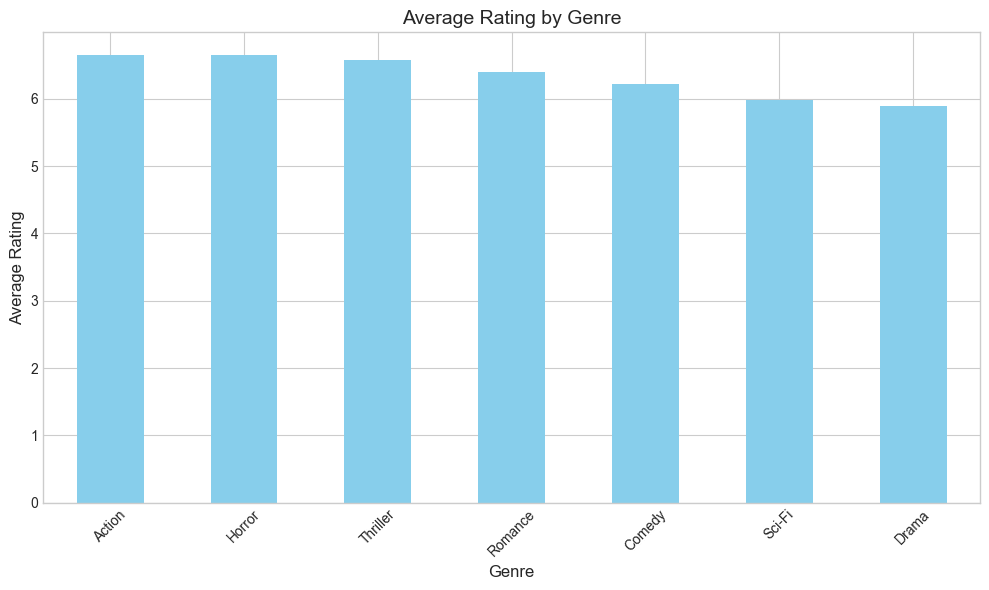

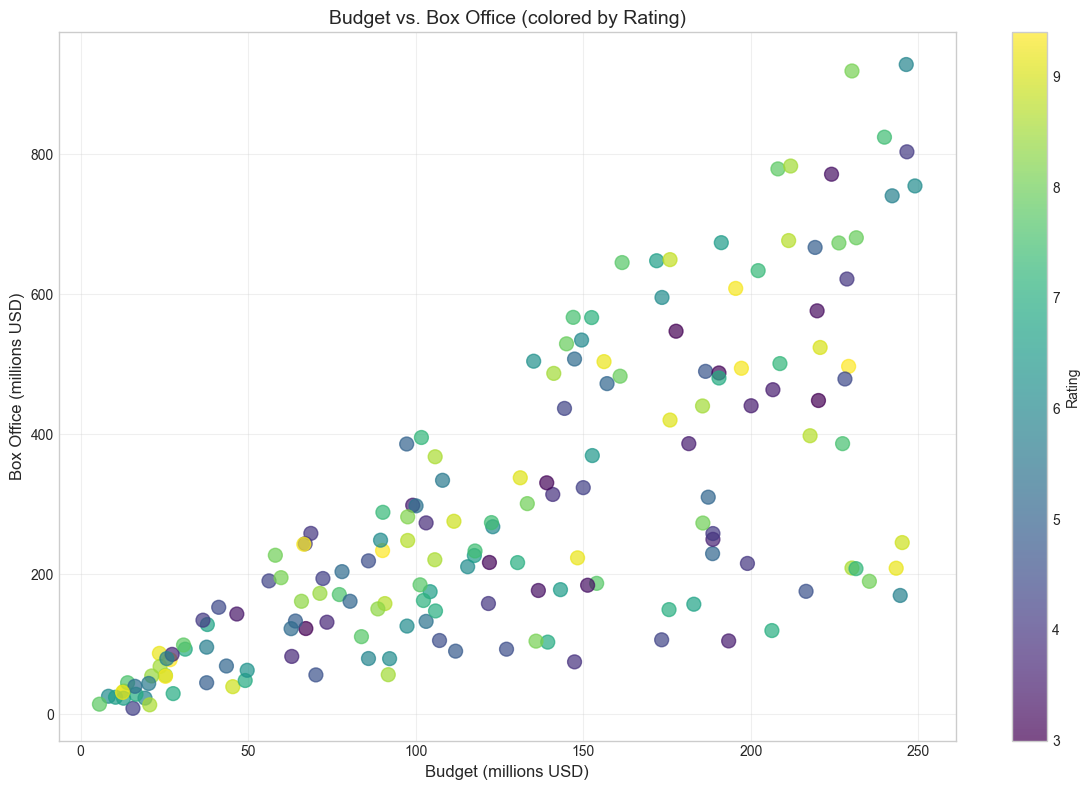

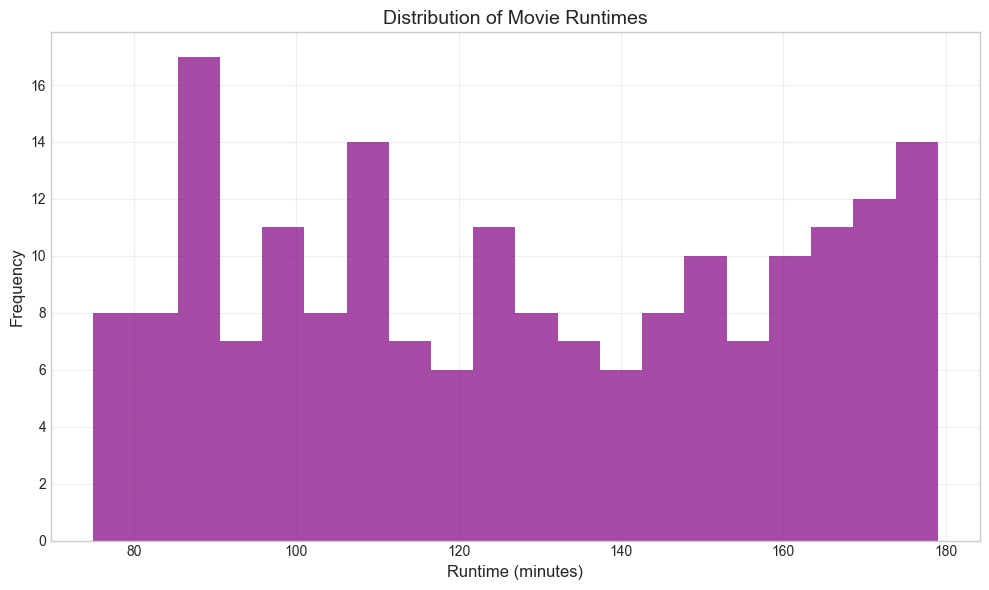

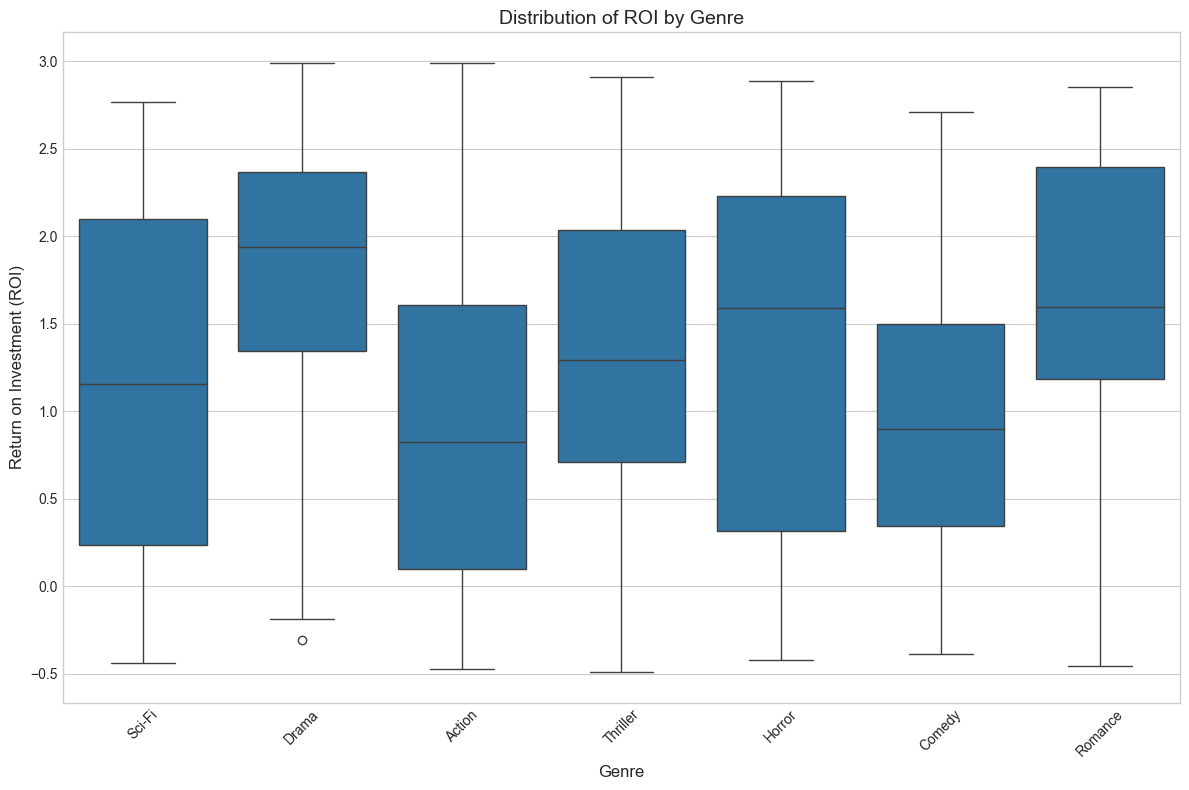

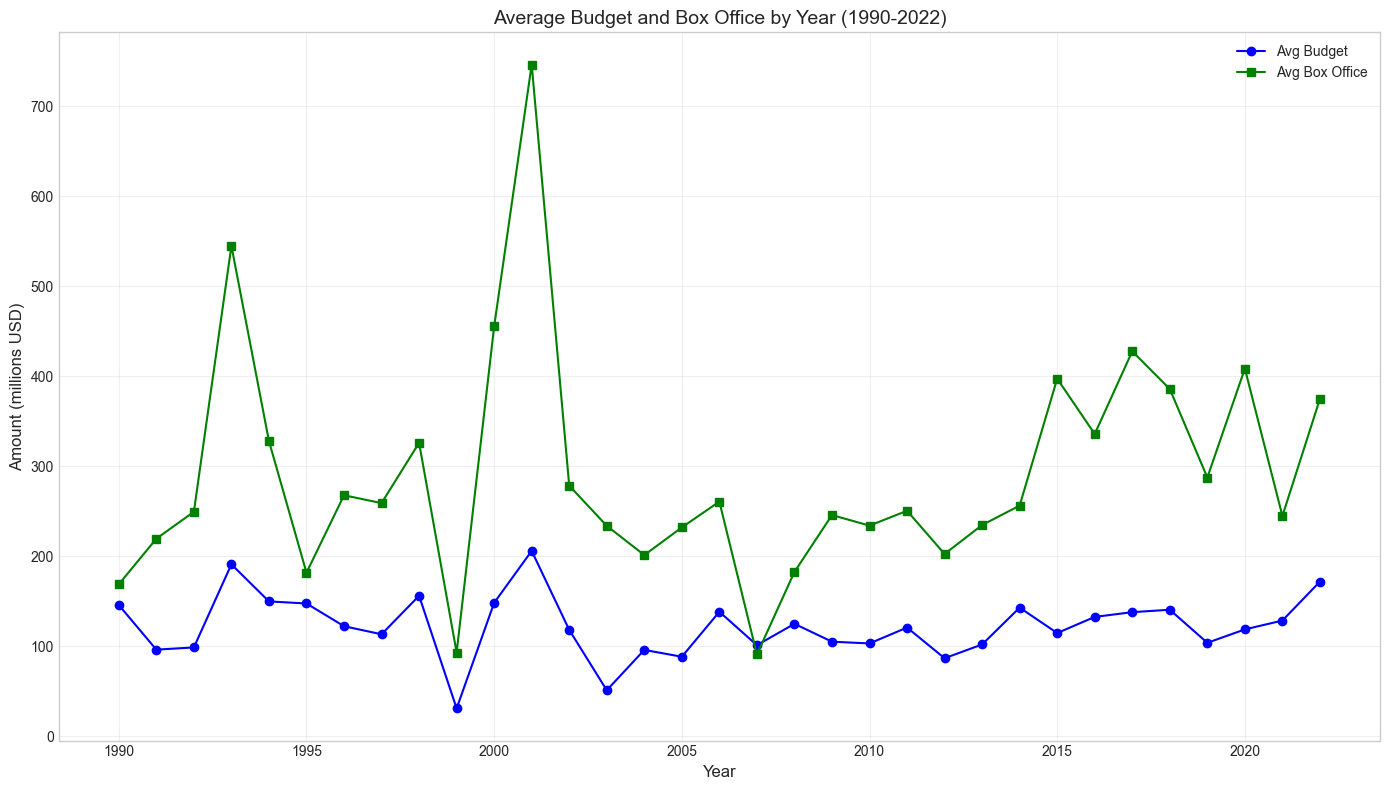

In [14]:
print("\nTask 5: Data Visualization")

# Setting the style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')

# 1. Bar chart showing the average rating by genre
plt.figure(figsize=(10, 6))
avg_rating_by_genre.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Genre', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('avg_rating_by_genre.png')
print("\n1. Bar chart created: avg_rating_by_genre.png")

# 2. Scatter plot of Budget vs. Box Office, colored by Rating
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    movies_data['Budget'], 
    movies_data['BoxOffice'],
    c=movies_data['Rating'],
    cmap='viridis',
    alpha=0.7,
    s=100
)
plt.colorbar(scatter, label='Rating')
plt.title('Budget vs. Box Office (colored by Rating)', fontsize=14)
plt.xlabel('Budget (millions USD)', fontsize=12)
plt.ylabel('Box Office (millions USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('budget_vs_boxoffice.png')
print("2. Scatter plot created: budget_vs_boxoffice.png")

# 3. Histogram of movie runtimes
plt.figure(figsize=(10, 6))
plt.hist(movies_data['Runtime'].dropna(), bins=20, color='purple', alpha=0.7)
plt.title('Distribution of Movie Runtimes', fontsize=14)
plt.xlabel('Runtime (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('runtime_distribution.png')
print("3. Histogram created: runtime_distribution.png")

# 4. Box plot showing the distribution of ROI by genre
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='ROI', data=movies_data)
plt.title('Distribution of ROI by Genre', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Return on Investment (ROI)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('roi_by_genre.png')
print("4. Box plot created: roi_by_genre.png")

# 5. Line plot showing the trend of average budget and box office by year
yearly_stats = movies_data.groupby('Year').agg({
    'Budget': 'mean',
    'BoxOffice': 'mean'
})

plt.figure(figsize=(14, 8))
plt.plot(yearly_stats.index, yearly_stats['Budget'], marker='o', linestyle='-', color='blue', label='Avg Budget')
plt.plot(yearly_stats.index, yearly_stats['BoxOffice'], marker='s', linestyle='-', color='green', label='Avg Box Office')
plt.title('Average Budget and Box Office by Year (1990-2022)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount (millions USD)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('budget_boxoffice_trend.png')
print("5. Line plot created: budget_boxoffice_trend.png")

print("\nAll tasks completed successfully!")